# 8. Data Analsys

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno

#匯入自己寫的程式
import dataframe_format as ff
import human_read_data as hr
import plot_analysis as pa

In [2]:
df = pd.read_csv('7_noisy_data.csv')

In [3]:
#df = ff.reindex_noisydata(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104261 entries, 0 to 104260
Data columns (total 44 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Identifier          104261 non-null  object 
 1   Num_Land            104261 non-null  int64  
 2   Num_Building        104261 non-null  int64  
 3   Num_ParkingSpace    104261 non-null  int64  
 4   Storeys             104261 non-null  float64
 5   Floor_Arabic        104261 non-null  float64
 6   Num_Floors          104261 non-null  float64
 7   HouseAge            104261 non-null  int64  
 8   CompletionYear      104261 non-null  int64  
 9   TransactionDate_AD  104261 non-null  int64  
 10  TransactionYear     104261 non-null  int64  
 11  TransactionMonth    104261 non-null  int64  
 12  Bedrooms            104261 non-null  int64  
 13  LivingRooms         104261 non-null  int64  
 14  Bathrooms           104261 non-null  int64  
 15  TotalArea           104261 non-nul

In [4]:
df.head()

,Identifier,Num_Land,Num_Building,Num_ParkingSpace,Storeys,Floor_Arabic,Num_Floors,HouseAge,CompletionYear,TransactionDate_AD,...,Num_Railway,Num_Primary_School,Num_Sec_School,NIMBY_Dist,Hospital_Dist,Metro_Dist,Railway_Dist,Primary_Dist,Sec_Dist,TotalPrice
0,RPPNMLOJPHJFFAA17CA,1,1,0,5.0,2.0,1.0,31,1983,201405,...,0,1,1,1927.848709,986.810123,580.619237,5518.296523,434.611897,232.583754,11300000
1,RPPSMLSJJIOFFCA28CA,3,1,0,18.0,10.0,1.0,9,2010,201910,...,0,3,2,5737.663362,1252.993661,30.933473,1646.111526,289.361797,265.468281,15930000
2,RPSNMLTLQHNFFFA56CA,2,1,1,14.0,13.0,1.0,-2,2018,201601,...,0,1,2,4111.327471,828.428002,355.217298,2511.303778,332.255267,141.307329,33000000
3,RPRNMLTLOHKFFAA08CA,1,1,0,4.0,1.0,1.0,38,1977,201504,...,0,2,2,2774.267401,1075.894739,815.794335,6311.609820,137.567134,240.123920,13000000
4,RPSNMLOKOHNFFAA87CA,1,1,1,12.0,6.0,1.0,0,2018,201804,...,0,2,2,2769.399126,2020.580964,1371.877712,7063.465463,432.853701,376.047718,55500000


# 7-1. Data Exploration

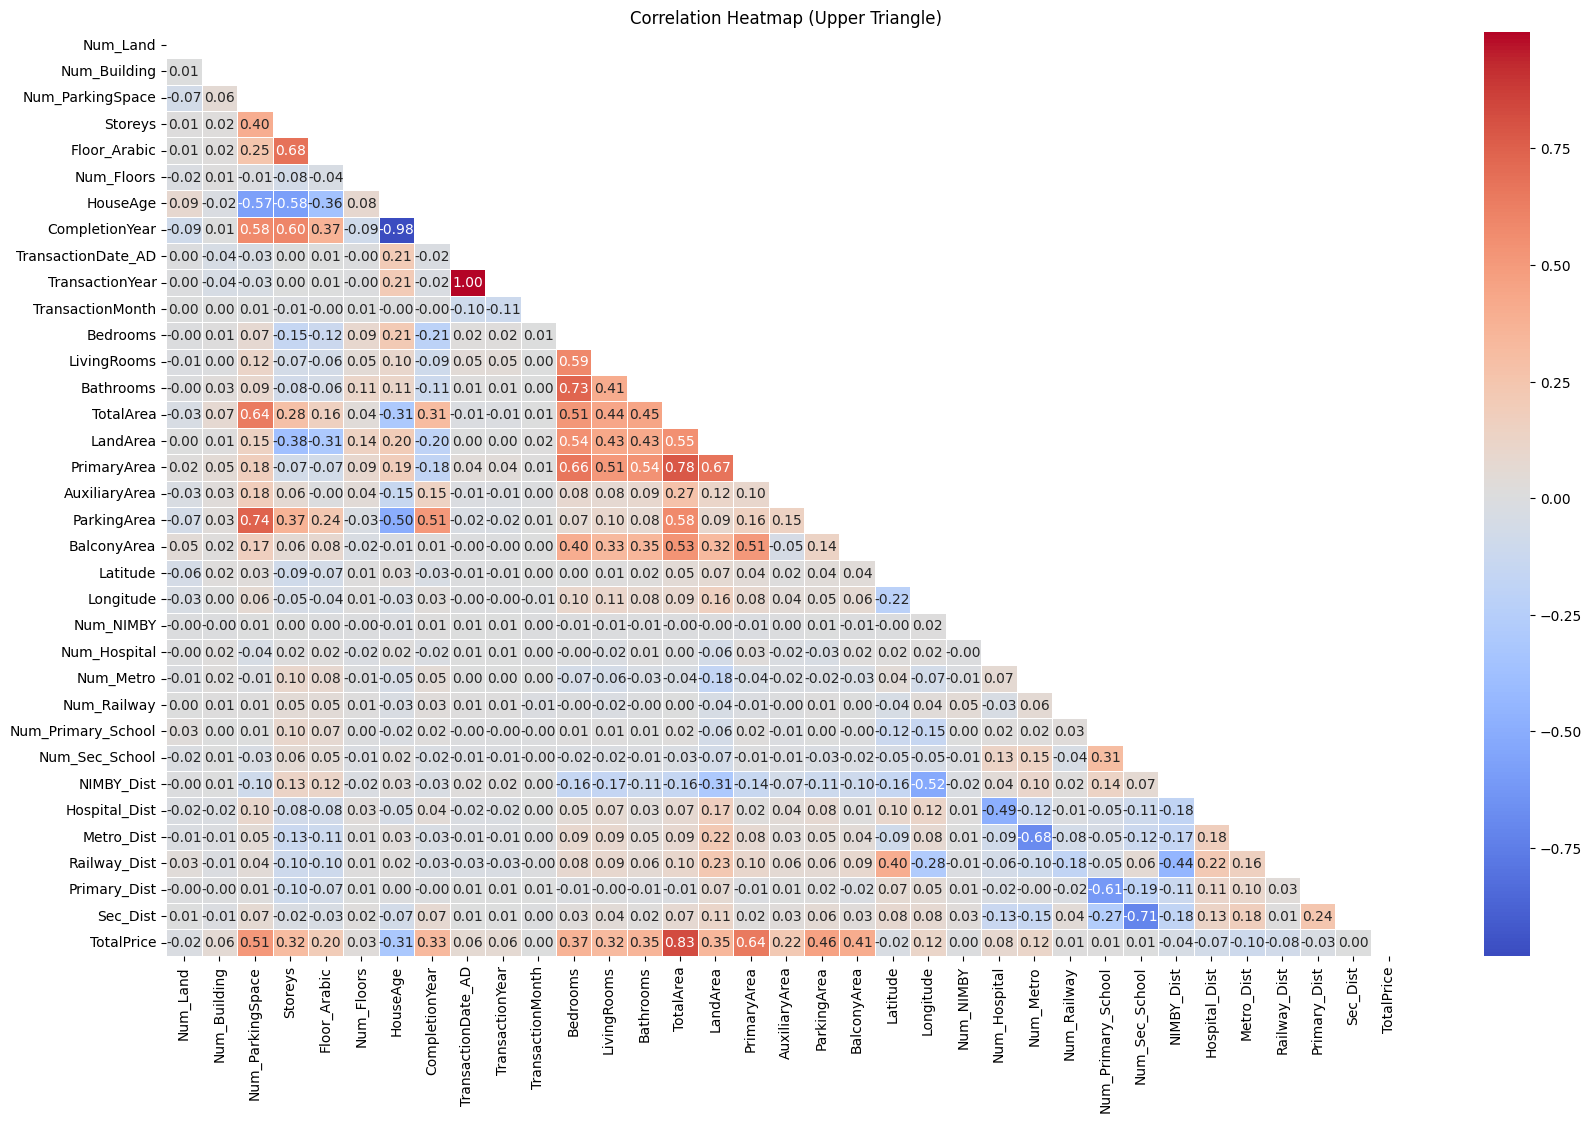

In [6]:
# Calculate the correlation coefficient matrix
pa.all_corr_heatmap(df)

104261


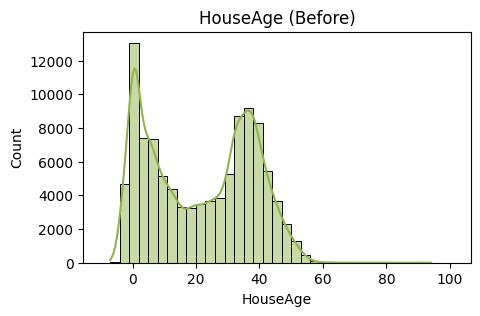

In [5]:
print(len(df['HouseAge']))
plt.figure(figsize=(5, 3))
plt.title('HouseAge (Before)')
sns.histplot(df['HouseAge'], color='#90B44B', bins=range(-10,103,3), kde=True)
plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

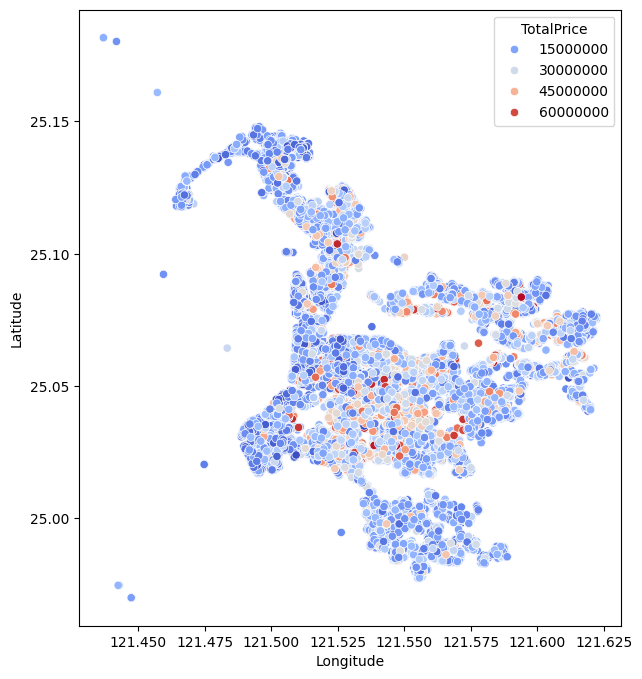

In [7]:
plt.figure(figsize=(7,8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='TotalPrice', palette='coolwarm')

<Axes: xlabel='Longitude', ylabel='Latitude'>

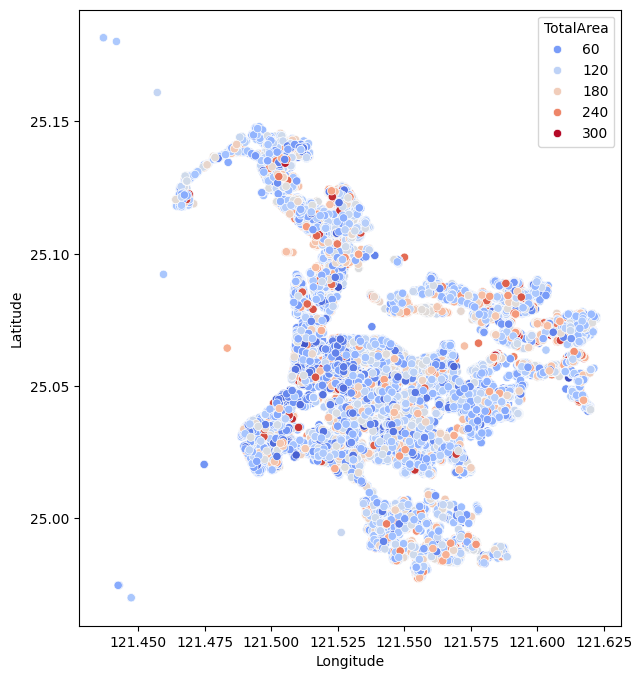

In [8]:
# 換算成 unitprice
plt.figure(figsize=(7,8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='TotalArea', palette='coolwarm')

<Axes: xlabel='TotalArea', ylabel='TotalPrice'>

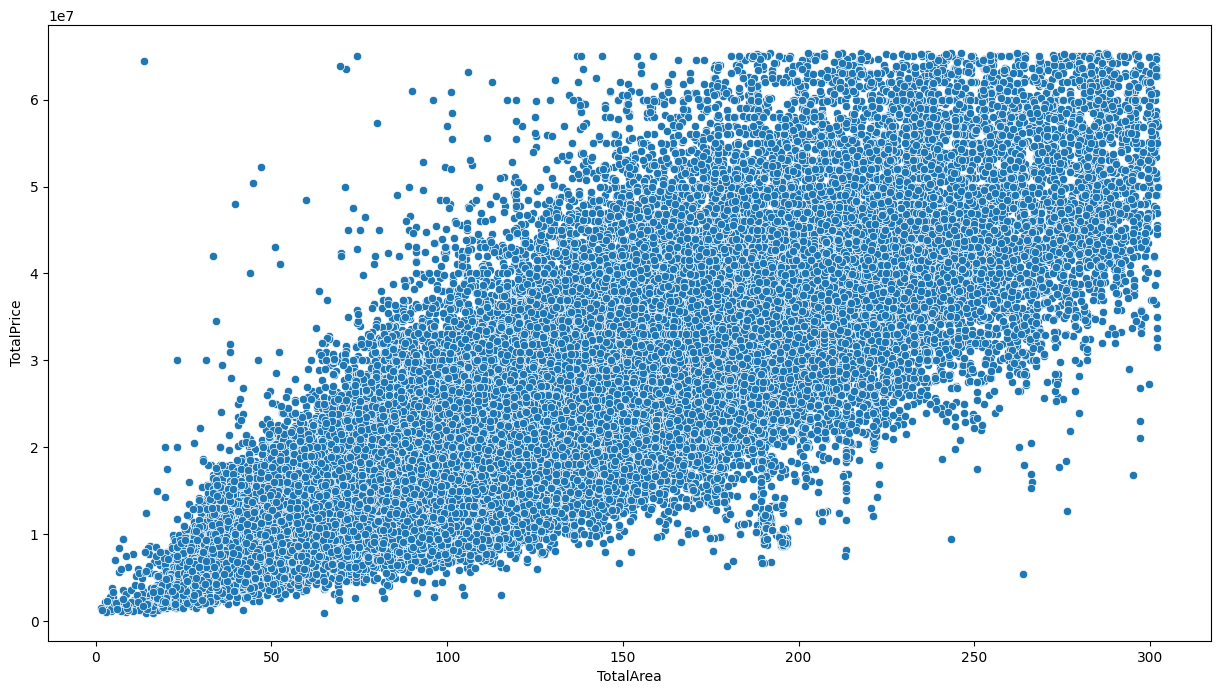

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='TotalArea', y='TotalPrice', data=df)

<Axes: xlabel='HouseAge', ylabel='TotalPrice'>

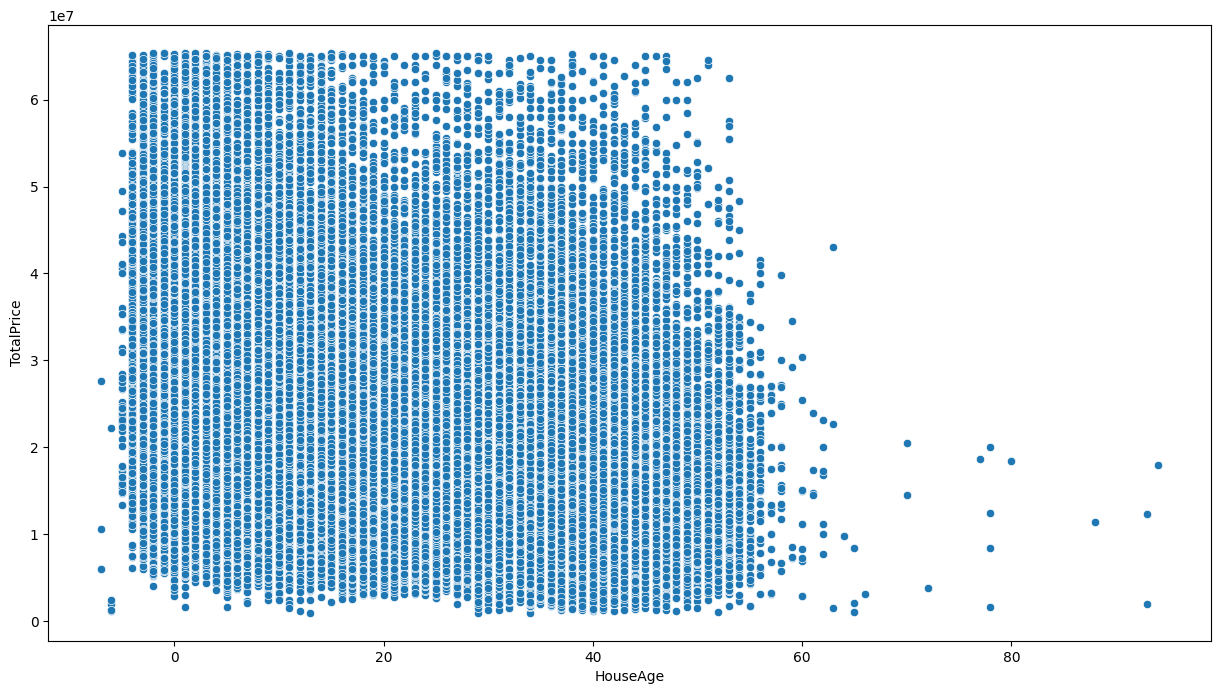

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='HouseAge', y='TotalPrice', data=df)

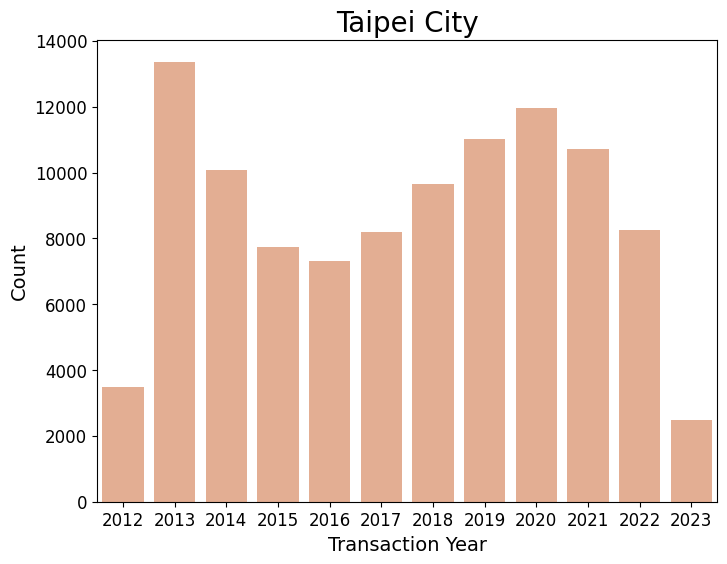

In [11]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Assuming 'TransactionYear' is on the x-axis and you want to count the occurrences
sns.countplot(data=df, x='TransactionYear', color='#F0A986')

# Set the x-axis label and font size
plt.xlabel('Transaction Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set the x-axis tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Taipei City', fontsize=20)
plt.show()

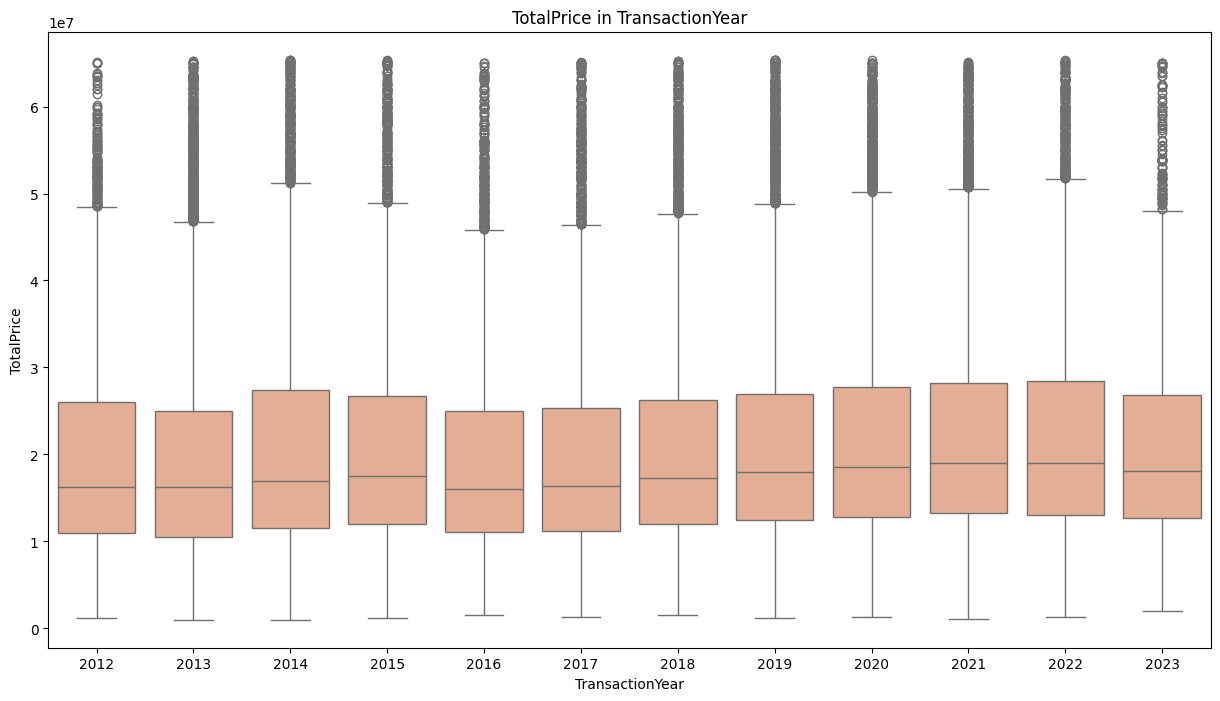

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='TransactionYear', y='TotalPrice', color='#F0A986')
plt.title('TotalPrice in TransactionYear')
plt.show()

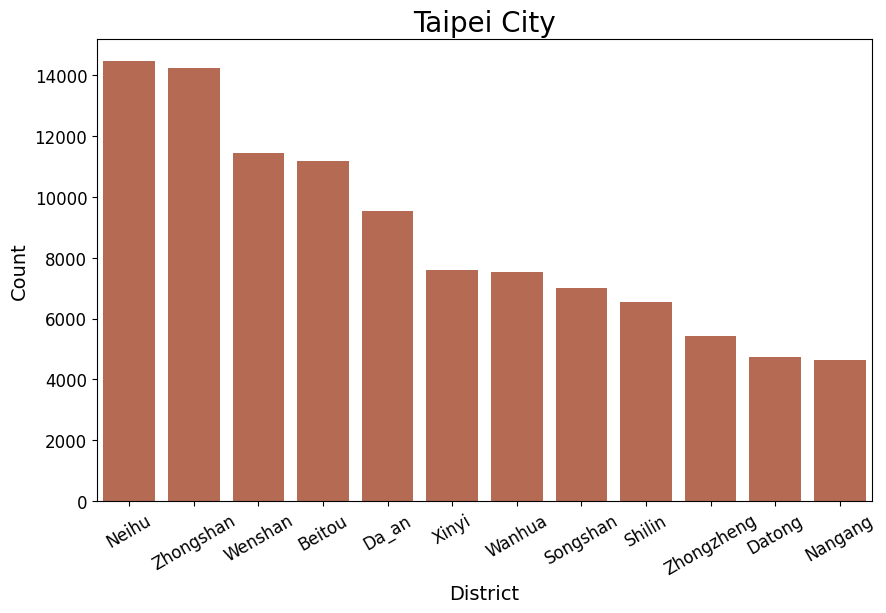

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Assuming 'District' is on the x-axis and you want to count the occurrences
sns.countplot(data=df, x='District', color='#C46243', order = df['District'].value_counts().index)

# Set the x-axis label and font size
plt.xlabel('District', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Set the x-axis tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation= 30)

plt.title('Taipei City', fontsize=20)
plt.show()

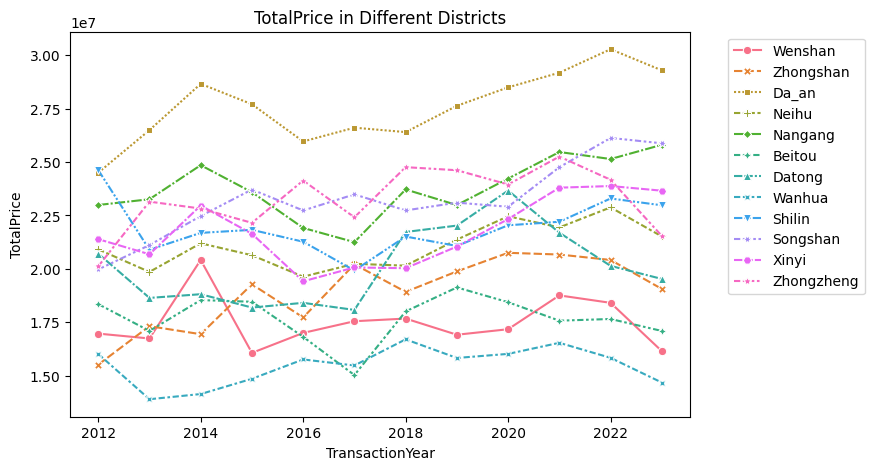

In [14]:
# District 各年的交易量 (line plot)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='TransactionYear', y='TotalPrice', hue='District', errorbar=None, style='District', markers=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TotalPrice in Different Districts')
plt.show()

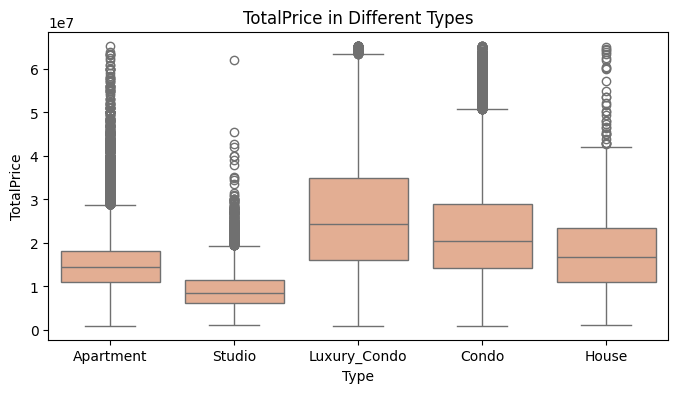

In [15]:
# Type 的 TatolPrice (box plot)
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Type', y='TotalPrice', color='#F0A986')
plt.title('TotalPrice in Different Types')
plt.show()

In [16]:
# k/ping
print(df_u['UnitPrice(k/ping)'].describe())
print(len(df_u['UnitPrice(k/ping)']))
plt.figure(figsize=(9, 8))
sns.histplot(df_u['UnitPrice(k/ping)'], color='#BF6766', bins=50, kde=True)
plt.show()

NameError: name 'df_u' is not defined